CLASSIFIER DOGS AND CATS 
* Visual studio code.
* Source code: tfds.image_classification.CatsVsDogs

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

datos, metadatos, = tfds.load('cats_vs_dogs', as_supervised= True, with_info=True) 

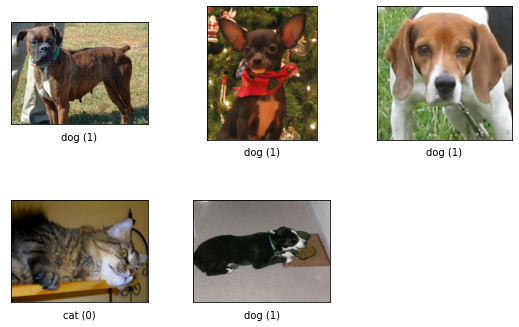

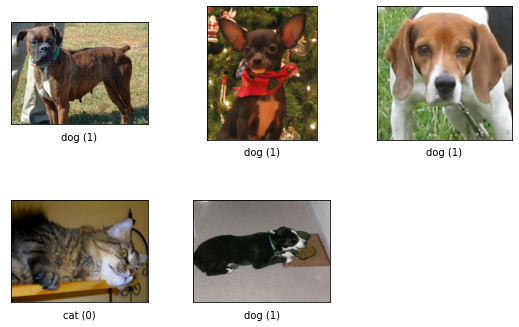

In [2]:
tfds.show_examples(datos['train'].take(5), metadatos)

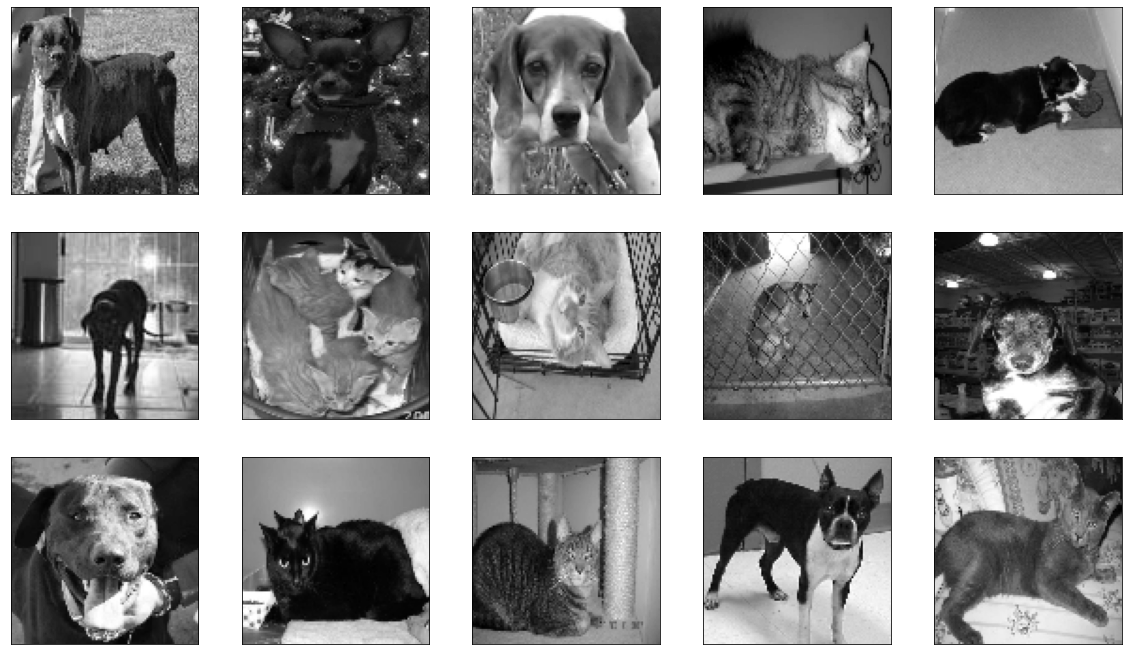

In [3]:
from cv2 import cvtColor
import matplotlib.pyplot as plt
import cv2 

plt.figure(figsize=(20,20))

tamano_img=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(15)):
    imagen = cv2.resize(imagen.numpy(), (tamano_img, tamano_img))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen, cmap='gray')

In [4]:
datos_entrenamiento = []

In [5]:

for i, (imagen, etiqueta) in enumerate(datos['train']): 
    imagen = cv2.resize(imagen.numpy(), (tamano_img, tamano_img))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(tamano_img, tamano_img, 1) #Cambia el tamano a 100,100,1
    datos_entrenamiento.append([imagen, etiqueta])

In [6]:
datos_entrenamiento[0]

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [7]:
len(datos_entrenamiento)

23262

In [8]:
x = [] #imagenes de entrada
y = [] #etiquetas (perros y gatos)

for imagen, etiqueta in datos_entrenamiento:
    x.append(imagen)
    y.append(etiqueta)

In [9]:
# NORMALIZACION DE LOS DATOS
import numpy as np
x = np.array(x).astype(float)/255

In [10]:
y = np.array(y)
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [11]:
x.shape

(23262, 100, 100, 1)

ARQUITECTURA E HIPER PARAMETROS


In [12]:
modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import TensorBoard

In [15]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(x, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

Epoch 1/100
618/618 [==============================] - 19s 28ms/step - loss: 0.7070 - accuracy: 0.5576 - val_loss: 0.6993 - val_accuracy: 0.5166
Epoch 2/100
618/618 [==============================] - 17s 28ms/step - loss: 0.6838 - accuracy: 0.5443 - val_loss: 0.6784 - val_accuracy: 0.5845
Epoch 3/100
618/618 [==============================] - 18s 29ms/step - loss: 0.6741 - accuracy: 0.5715 - val_loss: 0.6742 - val_accuracy: 0.5900
Epoch 4/100
618/618 [==============================] - 17s 28ms/step - loss: 0.6688 - accuracy: 0.5876 - val_loss: 0.6687 - val_accuracy: 0.5914
Epoch 5/100
618/618 [==============================] - 21s 33ms/step - loss: 0.6650 - accuracy: 0.5974 - val_loss: 0.6692 - val_accuracy: 0.5894
Epoch 6/100
618/618 [==============================] - 21s 34ms/step - loss: 0.6668 - accuracy: 0.5956 - val_loss: 0.6666 - val_accuracy: 0.5960
Epoch 7/100
618/618 [==============================] - 20s 33ms/step - loss: 0.6612 - accuracy: 0.6041 - val_loss: 0.6702 - val_ac

In [16]:
%load_ext tensorboard

In [17]:
%tensorboard --logdir logs

In [ ]:
#RED CONVOLUCIONAL
tensorboarCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(x, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboarCNN])

In [ ]:
#RED CONVOLUCIONAL
tensorboarCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(x, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboarCNN2])

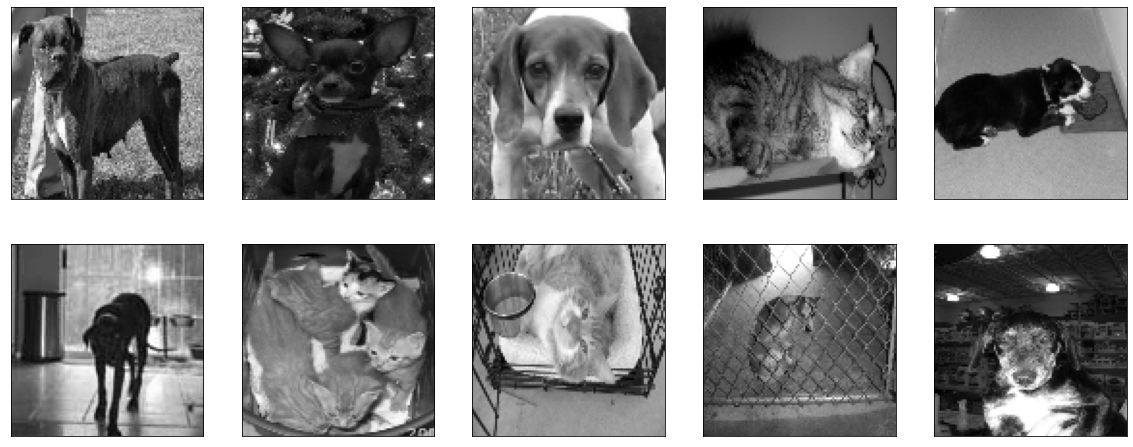

In [21]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i].reshape(100,100), cmap="gray")

AUMENTO DE DATOS

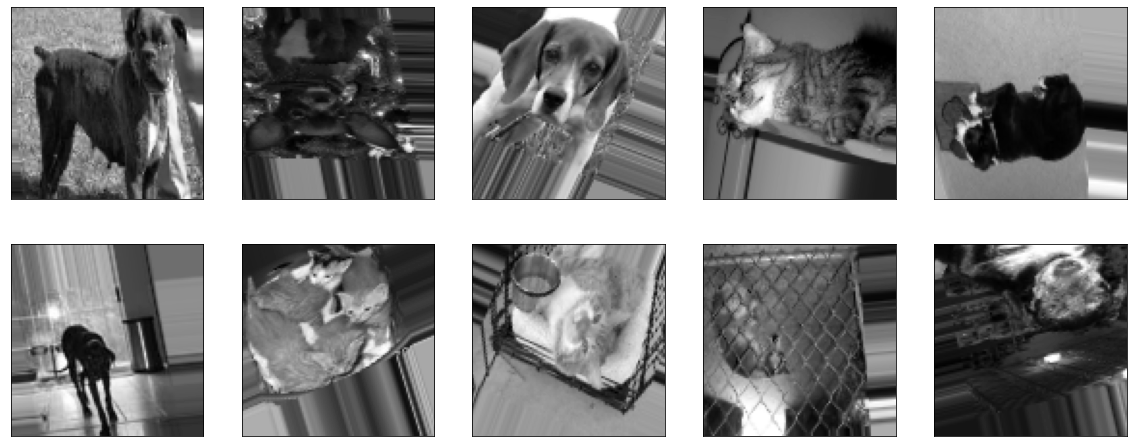

In [30]:
from turtle import width
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(x)

plt.figure(figsize=(20,8))

for imagen, etiqyea in datagen.flow(x,y,batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100), cmap="gray")
    break


In [31]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [51]:
len(x) * .85 #19700
len(x) - 19700 #3562

x_entrenamiento = x[:19700]
x_validacion = x[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [52]:
data_gen_entrenamiento = datagen.flow(x_entrenamiento, y_entrenamiento, batch_size=32)

In [56]:
#LIBERAR MEMORIA RAM
import gc
gc.collect()

2931

In [ ]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(x_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(x_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(x_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

In [ ]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(x_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(x_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(x_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)       

In [ ]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(x_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(x_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(x_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

In [62]:
modeloCNN_AD.save('perros-gatos-cnn-ad.h5')

In [ ]:
!pip install tensorflowjs

In [65]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras perros-gatos-cnn-ad.h5 carpeta_salida